# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df=pd.read_csv(r'C:\Users\Isaac Ninson\Desktop\New Python\My_Udacity_Project\Project 2\twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
print(response)

<Response [200]>


In [4]:
#save image-predictions.tsv file
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
#Read file
df_image=pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [7]:
# Authentication (default configuration).
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [8]:
count = 0
fails_dict = {}
start = timer()

In [9]:
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [10]:
url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response =requests.get(url)
print(response)

<Response [200]>


In [13]:
#save tweet-json file
with open('tweet-json.txt',mode='wb') as file:
    file.write(response.content)

In [14]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing the twitter archive data

Visual Assessment

In [15]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [166]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Observation
1. There are missing values in the following columns; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls
2. I require only original ratings not retweets and replies
3. The columns source and expanded_urls have complex entries
4. There are repetitions of entries in same row/observation under expanded_urls Columns
5. There are invalid/inaccurate entries for name column
6. There are extreme values for rating_numerator and rating_denominator
7. The following columns; doggo, floofer, pupper and puppo are categorical

Programmatic Assessment

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
print(sum(df.duplicated()))

0


In [20]:
df.expanded_urls.duplicated().sum()

137

In [85]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [188]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [189]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [749]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Observations
1. Timestamp is a string data instead of datetime data
2. Most observations made by visual assessment have been confirmed by the programmatic assessment

### Assessing Image Predictions Data

Visual Assessment

In [23]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Observation
1. There is inconsistency in capitalisation of names under columns p1, p2 and p3

Programmatic Assessment

In [25]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
print(sum(df_image.duplicated()))

0


In [32]:
df_image.jpg_url.duplicated().sum()

66

In [137]:
df_image.tweet_id.duplicated().sum()

0

In [145]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [146]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [147]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

Observation
1. Some entries are not dog
2. There is duplication in jpg_url columns

### Assessing Tweet_json Data

Visual Assessment

In [33]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [34]:
tweet_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


Observation
1. There are extreame values for retweet_count and favorite_count columns

programmatic assessment

In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [376]:
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [42]:
tweet_json.duplicated().sum()

0

Observation
1. Extreme values for retweet_count and favorite_count confirmed

### Quality issues
1. I require only original ratings not retweets and replies 

2. There are missing values in the following columns; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls

3. There are inconsistency of entries under expanded_urls Columns

4. There are inaccurate/inconsistent entries for name column

5. Timestamp is a string data instead of datetime data 

6. Some image predictions are not dog

7. There is duplication in jpg_url columns

8. There extreme values for rating_numerator and rating_denominator 

### Tidiness issues
1. The following columns; doggo, floofer, pupper and puppo are categorical and can be under one column

2. The columns source and expanded_urls have complex observation units

3. The three (3) different data sets needs to be merged together since they are related to same observational unit

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [184]:
# Make copies of original pieces of data
df_clean=df.copy()
df_image_clean=df_image.copy()
tweet_json_clean=tweet_json.copy()

### Addressing Quality Issues

### Issue #1

#### Define

 Find and drop rows that are not null under retweeted_status_id and in_reply_to_status_id. Afterwards drop columns related to retweets and replies

#### Code

In [185]:
#defind rows that are null
retweets=df_clean.retweeted_status_id.isnull()
replies=df_clean.in_reply_to_status_id.isnull()

#remove rows that are not null
df_clean=df_clean[retweets]
df_clean=df_clean[replies]

C:\Users\Isaac Ninson\AppData\Local\Temp\ipykernel_27112\1665489678.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean=df_clean[replies]


#### Test

In [186]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Code

In [187]:
#drop columns related to retweets and replies
df_clean=df_clean.drop(columns =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### Test 

In [188]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue # 2 & 3:

#### Define

Drop columns with inconsistent entries

#### Code

In [189]:
#drop expanded_urls columns
df_clean=df_clean.drop(columns =['expanded_urls'])

#### Test

In [190]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #4

#### Define 

Find and remove rows with inconsistent/inaccurate dog names

#### Code

In [191]:
# Given that 'name' is a proper noun, I will find and remove name starting with small letters
no_name=[]
for index in df_clean.name:
    if index.islower():
        no_name.append(index)
        
no_name=list(set(no_name))
no_name

['unacceptable',
 'space',
 'all',
 'very',
 'infuriating',
 'quite',
 'officially',
 'just',
 'incredibly',
 'an',
 'light',
 'such',
 'the',
 'life',
 'not',
 'a',
 'getting',
 'one',
 'his',
 'mad',
 'by',
 'my',
 'this',
 'actually',
 'old']

In [192]:
for index in no_name:
    df_clean.name.replace(index,'None', inplace=True)

#### Test

In [193]:
df_clean.name.isin(no_name).sum()

0

### Issue #5

#### Define : Convert timestamp from string to datetime data

#### Code

In [194]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

#### Test

In [195]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


### Issue #6

#### Define :  Creat additional columns to focus on observations that are dogs and remove irrelevant columns

#### Code 

In [196]:
#creating dog_breed column 
def categorise(row):  
    if row['p1_dog'] ==True:
        return row['p1']
    elif row['p2_dog']==True:
        return row['p2']
    elif row['p3_dog']==True:
        return row['p3']
    else:
        return 'Unknown'
df_image_clean['dog_breed'] = df_image_clean.apply(lambda row: categorise(row), axis=1)

In [197]:
#Removing columns that are not relevant for analysis
df_image_clean=df_image_clean.drop(columns =['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

In [198]:
#Capitalizing the first letter in breed name
df_image_clean.dog_breed=df_image_clean.dog_breed.str.capitalize()

#### Test 

In [199]:
df_image_clean.dog_breed.value_counts()

Unknown                 324
Golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
Entlebucher               1
Japanese_spaniel          1
Standard_schnauzer        1
Bouvier_des_flandres      1
Name: dog_breed, Length: 114, dtype: int64

### Issue #7 

#### Define :  Remove duplicated rows base on image url

#### Code 

In [200]:
url_duplicates=df_image_clean.jpg_url.duplicated()
url_duplicates=np.logical_not(url_duplicates)
df_image_clean=df_image_clean[url_duplicates]

#### Test 

In [201]:
df_image_clean.jpg_url.duplicated().sum()

0

In [202]:
#dropping jpg_url and img_num which are not relevant for my analysis
df_image_clean=df_image_clean.drop(columns =['jpg_url','img_num'])

In [203]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2009 non-null   int64 
 1   dog_breed  2009 non-null   object
dtypes: int64(1), object(1)
memory usage: 47.1+ KB


### Issue #8 

#### Define : Remove extreme values for rating_numerator and rating_denominator 

#### Code 

In [204]:
#value count of rating_numerator before cleaning
df_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [205]:
#value count of rating_denominator before cleaning
df_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [206]:
#dropping extreme values
df_clean.drop(df_clean[df_clean['rating_numerator']<9].index,inplace=True)
df_clean.drop(df_clean[df_clean['rating_numerator']>13].index,inplace=True)
df_clean.drop(df_clean[df_clean['rating_denominator']<10].index,inplace=True)
df_clean.drop(df_clean[df_clean['rating_denominator']>10].index,inplace=True)

#### Test 

In [207]:
df_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
Name: rating_numerator, dtype: int64

In [208]:
df_clean.rating_denominator.value_counts()

10    1774
Name: rating_denominator, dtype: int64

### Addressing Tidiness Issues 

#### Issue #1 

#### Define : Group categorical data under one column 

#### Code 

In [209]:
#df_clean info before cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1774 non-null   int64              
 1   timestamp           1774 non-null   datetime64[ns, UTC]
 2   source              1774 non-null   object             
 3   text                1774 non-null   object             
 4   rating_numerator    1774 non-null   int64              
 5   rating_denominator  1774 non-null   int64              
 6   name                1774 non-null   object             
 7   doggo               1774 non-null   object             
 8   floofer             1774 non-null   object             
 9   pupper              1774 non-null   object             
 10  puppo               1774 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 166.3+ KB


In [210]:
# create a list of my conditions
conditions = [
    (df_clean['doggo'] == 'doggo'),
    (df_clean['floofer'] =='floofer'), 
    (df_clean['pupper'] == 'pupper'),
    (df_clean['puppo'] == 'puppo')] 

# create a list of the values I want to assign for each condition
values = ['doggo', 'floof', 'pupper', 'puppo']

# create a new column and use np.select to assign values to it using our lists as arguments
df_clean['dog_stage'] = np.select(conditions, values)

#dropping collapsed columns
df_clean=df_clean.drop(columns =['doggo','floofer','pupper','puppo'])

# display updated DataFrame
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,0


In [211]:
#replace value '0' with 'None' under dog_stage column
df_clean['dog_stage'] = df_clean['dog_stage'].replace('0','None')

#### Test 

In [212]:
df_clean.dog_stage.value_counts()

None      1482
pupper     190
doggo       71
puppo       22
floof        9
Name: dog_stage, dtype: int64

In [213]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1774 non-null   int64              
 1   timestamp           1774 non-null   datetime64[ns, UTC]
 2   source              1774 non-null   object             
 3   text                1774 non-null   object             
 4   rating_numerator    1774 non-null   int64              
 5   rating_denominator  1774 non-null   int64              
 6   name                1774 non-null   object             
 7   dog_stage           1774 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 124.7+ KB


#### Issue #2 

#### Define: Replace complex entry names for source column 

#### Code 

In [214]:
#obtain value counts for source
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1655
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          86
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       23
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [215]:
df_clean.source=df_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test 

In [216]:
df_clean.source.value_counts()

Twitter for iPhone     1655
Vine - Make a Scene      86
Twitter Web Client       23
TweetDeck                10
Name: source, dtype: int64

#### Issue #3 

#### Define : Merge all three(3) dataset 

#### Code 

In [217]:
# Merge the archive data with the image prediction data
df_clean = pd.merge(df_clean,df_image_clean, how="left", on=['tweet_id'])

In [218]:
#merge data in line 217 with tweet_json data
df_master_clean = pd.merge(df_clean,tweet_json_clean, how="left", on=['tweet_id'])

#### Test 

In [221]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 1773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1774 non-null   int64              
 1   timestamp           1774 non-null   datetime64[ns, UTC]
 2   source              1774 non-null   object             
 3   text                1774 non-null   object             
 4   rating_numerator    1774 non-null   int64              
 5   rating_denominator  1774 non-null   int64              
 6   name                1774 non-null   object             
 7   dog_stage           1774 non-null   object             
 8   dog_breed           1657 non-null   object             
 9   retweet_count       1774 non-null   int64              
 10  favorite_count      1774 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 166.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [222]:
df_master_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [223]:
df_master=pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,Unknown,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,Basset,9774,41048


In [224]:
#Defining a function called percentage which returns percentage value for Patients counts on the categorical data
def percentage(column_name):print((df_master[column_name].value_counts(normalize=True))*100)
    
#Determine percentage of patients who showed-up as well as those that didn't show-up for their appointment
percentage('source')

Twitter for iPhone     93.291995
Vine - Make a Scene     4.847802
Twitter Web Client      1.296505
TweetDeck               0.563698
Name: source, dtype: float64


In [225]:
percentage('dog_stage')

None      83.540023
pupper    10.710259
doggo      4.002255
puppo      1.240135
floof      0.507328
Name: dog_stage, dtype: float64


In [243]:
percentage('dog_breed')

Unknown               10.500905
Golden_retriever       8.931804
Labrador_retriever     5.914303
Pembroke               5.069403
Chihuahua              4.646952
                        ...    
Scotch_terrier         0.060350
Entlebucher            0.060350
Standard_schnauzer     0.060350
Silky_terrier          0.060350
Irish_wolfhound        0.060350
Name: dog_breed, Length: 111, dtype: float64


### Insights: 

From the archive clean data and image prediction clean data, I have the below insight;
1. 93% of the tweets came from iPhone

2. 83% of the tweets didn't specify the dog stage while pupper had the highest frequency of dog_stage

3. 10% of the tweets didn't specify the dog breed while Golden_retriever had the highest tweets

### Visualization

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

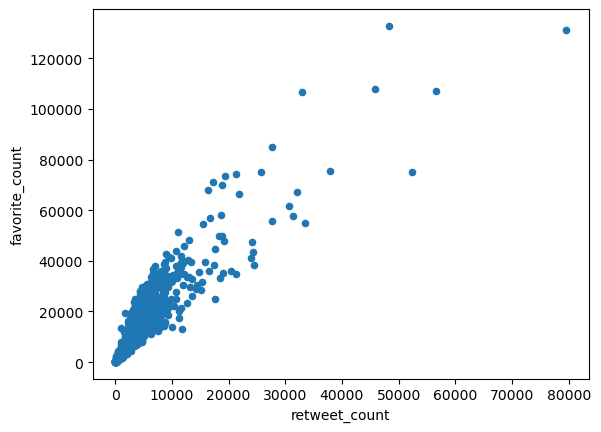

In [230]:
#from the tweet_json_clean data, I check the relation between retweet_count and favorite_count
df_master.plot(x='retweet_count',y='favorite_count',kind='scatter')

From the scatter plot retweet_counts and favorite_counts have positive relationship

### References 
1. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
2. https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d
3. https://datatofish.com/replace-values-pandas-dataframe/
4. https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
5. https://www.projectpro.io/recipes/insert-new-column-based-on-condition-in-python
6. https://realpython.com/pandas-merge-join-and-concat/
7. https://www.digitalocean.com/community/tutorials/pandas-merge-two-dataframe